In [1]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.express as px

In [2]:
conn=pymysql.connect(host='localhost',port=int(3306),user='root',passwd='1a_2b_3c_4d$',db='coffee_chain')
conn

In [3]:
coffee_table="select * from coffee_chain"

coffee_table=pd.read_sql_query(coffee_table,conn)
coffee_table

,Area Code,Cogs,Difference Between Actual and Target Profit,Date,Inventory,Margin,Market Size,Market,Marketing,???,...,Product,Profit,Sales,State,Target COGS,Target Margin,Target Profit,Target Sales,Total Expenses,Type
0,303,51,-35,10/1/2012 0:00,503,71,Major Market,Central,46,1,...,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,-24,10/1/2012 0:00,405,71,Major Market,Central,17,1,...,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2,409,43,-22,10/1/2012 0:00,419,64,Major Market,South,13,1,...,Lemon,28,107,Texas,30,60,50,90,36,Decaf
3,850,38,-15,10/1/2012 0:00,871,56,Major Market,East,10,1,...,Darjeeling,35,94,Florida,40,60,50,100,21,Regular
4,562,72,6,10/1/2012 0:00,650,110,Major Market,West,23,1,...,Green Tea,56,182,California,20,60,50,80,54,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,775,250,133,12/1/2013 0:00,1820,251,Small Market,West,70,1,...,Earl Grey,233,534,Nevada,180,180,100,360,94,Regular
1058,971,88,48,12/1/2013 0:00,817,133,Small Market,West,29,1,...,Earl Grey,108,236,Oregon,60,100,60,160,60,Regular
1059,775,294,-285,12/1/2013 0:00,8252,-294,Small Market,West,111,1,...,Green Tea,-605,33,Nevada,210,-210,-320,0,145,Regular
1060,503,134,80,12/1/2013 0:00,690,186,Small Market,West,41,1,...,Green Tea,180,341,Oregon,90,140,100,230,65,Regular


In [4]:
#checking reliability

In [5]:
coffee_table.isnull().sum()

Area Code                                      0
Cogs                                           0
Difference Between Actual and Target Profit    0
Date                                           0
Inventory                                      0
Margin                                         0
Market Size                                    0
Market                                         0
Marketing                                      0
???                                            0
Product Line                                   0
Product Type                                   0
Product                                        0
Profit                                         0
Sales                                          0
State                                          0
Target COGS                                    0
Target Margin                                  0
Target Profit                                  0
Target Sales                                   0
Total Expenses      

In [6]:
coffee_table.dtypes

Area Code                                       int64
Cogs                                            int64
Difference Between Actual and Target Profit     int64
Date                                           object
Inventory                                       int64
Margin                                          int64
Market Size                                    object
Market                                         object
Marketing                                       int64
???                                             int64
Product Line                                   object
Product Type                                   object
Product                                        object
Profit                                          int64
Sales                                           int64
State                                          object
Target COGS                                     int64
Target Margin                                   int64
Target Profit               

In [6]:
coffee_table.columns

Index(['Area Code', 'Cogs', 'Difference Between Actual and Target Profit',
       'Date', 'Inventory', 'Margin', 'Market Size', 'Market', 'Marketing',
       '???', 'Product Line', 'Product Type', 'Product', 'Profit', 'Sales',
       'State', 'Target COGS', 'Target Margin', 'Target Profit',
       'Target Sales', 'Total Expenses', 'Type'],
      dtype='object')

In [7]:
coffee_table.describe()

,Area Code,Cogs,Difference Between Actual and Target Profit,Inventory,Margin,Marketing,???,Profit,Sales,Target COGS,Target Margin,Target Profit,Target Sales,Total Expenses
count,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.0,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000
mean,587.030132,82.399247,0.387006,815.175141,102.423729,30.433145,1.0,60.556497,191.049906,71.676083,96.817326,60.169492,168.493409,53.836158
std,225.299162,64.824295,44.331180,916.156386,91.286704,25.963448,0.0,100.516593,148.270317,65.701583,89.467176,77.824869,145.955171,31.703526
min,203.000000,0.000000,-369.000000,-3534.000000,-294.000000,0.000000,1.0,-605.000000,21.000000,0.000000,-210.000000,-320.000000,0.000000,11.000000
25%,425.000000,41.000000,-15.000000,447.000000,51.000000,13.000000,1.0,16.250000,98.000000,30.000000,50.000000,20.000000,80.000000,33.000000
50%,573.000000,57.000000,-3.000000,659.000000,73.000000,22.000000,1.0,39.500000,133.000000,50.000000,70.000000,40.000000,120.000000,46.000000
75%,774.000000,101.000000,13.000000,968.000000,130.000000,40.750000,1.0,87.000000,227.000000,90.000000,120.000000,80.000000,210.000000,66.000000
max,985.000000,294.000000,249.000000,8252.000000,526.000000,122.000000,1.0,646.000000,815.000000,380.000000,580.000000,470.000000,960.000000,156.000000


In [8]:
#as it's clear , there is lots of variance in the data , so lets check for outliers

<AxesSubplot:>

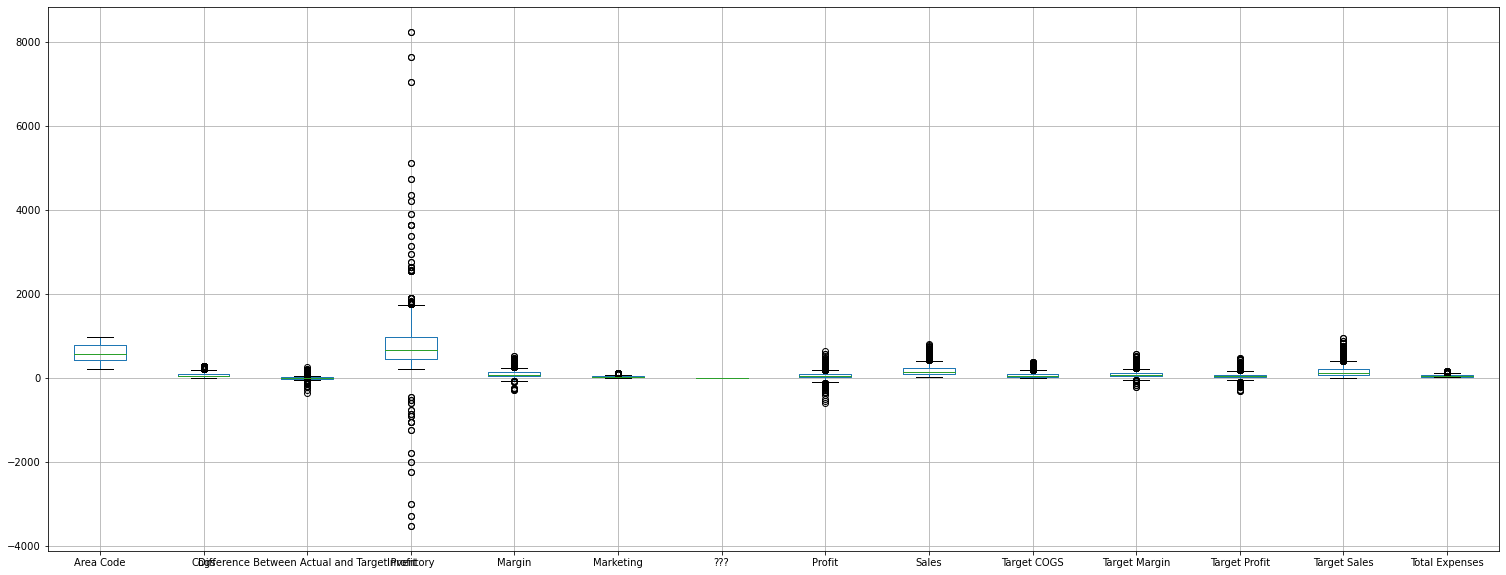

In [14]:
plt.figure(figsize=(26,10)) 
coffee_table.boxplot()

In [24]:
coffee_table.quantile([0,0.25,0.5,0.75,1])

,Area Code,Cogs,Difference Between Actual and Target Profit,Inventory,Margin,Marketing,???,Profit,Sales,Target COGS,Target Margin,Target Profit,Target Sales,Total Expenses
0.00,203.0,0.0,-130.0,-3534.0,-69.0,0.0,1.0,-332.0,23.0,0.0,-70.0,-210.0,10.0,11.0
0.25,419.0,39.0,-15.0,424.0,49.0,12.0,1.0,16.0,92.5,30.0,50.0,20.0,80.0,27.0
0.50,563.0,54.0,-4.0,601.0,71.0,20.0,1.0,35.5,128.0,40.0,70.0,40.0,110.0,45.0
0.75,774.0,82.0,8.0,863.0,112.0,31.0,1.0,70.0,198.0,80.0,100.0,70.0,180.0,58.0
1.00,985.0,181.0,219.0,3909.0,443.0,122.0,1.0,579.0,543.0,230.0,390.0,360.0,470.0,156.0


In [26]:
#Evaluating Outliers
Cogs_Q1=coffee_table['Cogs'].quantile(0.25)
Cogs_Q3=coffee_table['Cogs'].quantile(0.75)
IQR_cogs = Cogs_Q3 - Cogs_Q1
Cogs_lower = Cogs_Q1 - 1.5*IQR_cogs
Cogs_upper = Cogs_Q3 + 1.5*IQR_cogs
Cogs_outliers = coffee_table[(coffee_table['Cogs']>Cogs_upper)|(coffee_table['Cogs']<Cogs_lower)]
Cogs_outliers

,Area Code,Cogs,Difference Between Actual and Target Profit,Date,Inventory,Margin,Market Size,Market,Marketing,???,...,Product,Profit,Sales,State,Target COGS,Target Margin,Target Profit,Target Sales,Total Expenses,Type
647,781,161,-28,10/1/2012 0:00,1267,161,Major Market,East,45,1,...,Regular Espresso,92,322,Massachusetts,140,160,120,300,69,Regular
662,508,181,-12,11/1/2012 0:00,1283,182,Major Market,East,50,1,...,Regular Espresso,108,363,Massachusetts,170,180,120,350,74,Regular
676,351,153,7,12/1/2012 0:00,1319,153,Major Market,East,42,1,...,Regular Espresso,87,306,Massachusetts,150,140,80,290,66,Regular
689,508,161,17,10/1/2013 0:00,1267,161,Major Market,East,45,1,...,Regular Espresso,137,343,Massachusetts,140,160,120,300,69,Regular
704,617,181,40,11/1/2013 0:00,1283,182,Major Market,East,50,1,...,Regular Espresso,160,387,Massachusetts,170,180,120,350,74,Regular
718,857,153,49,12/1/2013 0:00,1319,153,Major Market,East,42,1,...,Regular Espresso,129,326,Massachusetts,150,140,80,290,66,Regular
730,815,154,-40,10/1/2012 0:00,1132,213,Major Market,Central,50,1,...,Colombian,120,367,Illinois,150,220,160,370,93,Regular
733,567,161,-98,10/1/2012 0:00,1267,161,Major Market,Central,45,1,...,Caffe Mocha,92,322,Ohio,230,240,190,470,69,Regular
734,719,161,-18,10/1/2012 0:00,1267,161,Major Market,Central,45,1,...,Chamomile,92,322,Colorado,120,140,110,260,69,Decaf
757,815,173,-1,11/1/2012 0:00,1150,239,Major Market,Central,57,1,...,Colombian,139,412,Illinois,170,230,140,400,100,Regular


In [22]:
#Removing COGS outliers
coffee_table=coffee_table[~(coffee_table['Cogs']>Cogs_upper)|(coffee_table['Cogs']<Cogs_lower)]
coffee_table

,Area Code,Cogs,Difference Between Actual and Target Profit,Date,Inventory,Margin,Market Size,Market,Marketing,???,...,Product,Profit,Sales,State,Target COGS,Target Margin,Target Profit,Target Sales,Total Expenses,Type
0,303,51,-35,10/1/2012 0:00,503,71,Major Market,Central,46,1,...,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,-24,10/1/2012 0:00,405,71,Major Market,Central,17,1,...,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2,409,43,-22,10/1/2012 0:00,419,64,Major Market,South,13,1,...,Lemon,28,107,Texas,30,60,50,90,36,Decaf
3,850,38,-15,10/1/2012 0:00,871,56,Major Market,East,10,1,...,Darjeeling,35,94,Florida,40,60,50,100,21,Regular
4,562,72,6,10/1/2012 0:00,650,110,Major Market,West,23,1,...,Green Tea,56,182,California,20,60,50,80,54,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,503,81,28,12/1/2013 0:00,551,104,Small Market,West,26,1,...,Lemon,98,197,Oregon,70,100,70,170,38,Decaf
1055,775,127,61,12/1/2013 0:00,830,185,Small Market,West,40,1,...,Mint,181,332,Nevada,120,170,120,290,63,Decaf
1058,971,88,48,12/1/2013 0:00,817,133,Small Market,West,29,1,...,Earl Grey,108,236,Oregon,60,100,60,160,60,Regular
1060,503,134,80,12/1/2013 0:00,690,186,Small Market,West,41,1,...,Green Tea,180,341,Oregon,90,140,100,230,65,Regular


In [29]:
#Difference Between Actual and Target Profit_outliers

diff_Q1=coffee_table['Difference Between Actual and Target Profit'].quantile(0.25)

diff_Q3=coffee_table['Difference Between Actual and Target Profit'].quantile(0.75)
IQR_diff = diff_Q3 - diff_Q1
diff_lower = diff_Q1 - 1.5*IQR_diff
diff_upper = diff_Q3  + 1.5*IQR_diff
diff_outliers = coffee_table[(coffee_table['Difference Between Actual and Target Profit']>diff_upper)|(coffee_table['Difference Between Actual and Target Profit']<diff_lower)]
diff_outliers

,Area Code,Cogs,Difference Between Actual and Target Profit,Date,Inventory,Margin,Market Size,Market,Marketing,???,...,Product,Profit,Sales,State,Target COGS,Target Margin,Target Profit,Target Sales,Total Expenses,Type
122,430,54,37,12/1/2013 0:00,601,79,Major Market,South,15,1,...,Decaf Espresso,77,142,Texas,40,60,40,100,27,Decaf
293,505,86,-49,10/1/2013 0:00,1698,23,Small Market,South,26,1,...,Decaf Irish Cream,-39,116,New Mexico,110,40,10,150,49,Decaf
407,361,67,40,12/1/2013 0:00,-1239,101,Major Market,South,22,1,...,Caffe Latte,70,179,Texas,50,70,30,120,54,Regular
505,660,32,-52,10/1/2012 0:00,833,47,Small Market,Central,8,1,...,Decaf Espresso,28,79,Missouri,30,80,80,110,19,Decaf
566,214,39,-54,10/1/2012 0:00,541,51,Major Market,South,12,1,...,Decaf Irish Cream,26,90,Texas,40,90,80,130,25,Decaf
571,505,45,-57,10/1/2012 0:00,447,69,Small Market,South,14,1,...,Colombian,23,114,New Mexico,50,110,80,160,46,Regular
572,918,90,-66,10/1/2012 0:00,572,115,Small Market,South,29,1,...,Colombian,74,205,Oklahoma,130,160,140,290,41,Regular
636,203,125,41,10/1/2013 0:00,1119,188,Small Market,East,41,1,...,Colombian,171,334,Connecticut,100,160,130,260,73,Regular
688,914,125,-130,10/1/2013 0:00,3142,-56,Major Market,East,113,1,...,Caffe Mocha,-300,74,New York,110,-60,-170,50,146,Regular
695,718,123,39,10/1/2013 0:00,915,179,Major Market,East,34,1,...,Earl Grey,199,322,New York,130,190,160,320,45,Regular


In [30]:
#Removing diff outliers
coffee_table=coffee_table[~(coffee_table['Difference Between Actual and Target Profit']>diff_upper)|(coffee_table['Difference Between Actual and Target Profit']<diff_lower)]
coffee_table

,Area Code,Cogs,Difference Between Actual and Target Profit,Date,Inventory,Margin,Market Size,Market,Marketing,???,...,Product,Profit,Sales,State,Target COGS,Target Margin,Target Profit,Target Sales,Total Expenses,Type
0,303,51,-35,10/1/2012 0:00,503,71,Major Market,Central,46,1,...,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,-24,10/1/2012 0:00,405,71,Major Market,Central,17,1,...,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2,409,43,-22,10/1/2012 0:00,419,64,Major Market,South,13,1,...,Lemon,28,107,Texas,30,60,50,90,36,Decaf
3,850,38,-15,10/1/2012 0:00,871,56,Major Market,East,10,1,...,Darjeeling,35,94,Florida,40,60,50,100,21,Regular
4,562,72,6,10/1/2012 0:00,650,110,Major Market,West,23,1,...,Green Tea,56,182,California,20,60,50,80,54,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,360,72,6,12/1/2013 0:00,461,104,Small Market,West,23,1,...,Colombian,86,188,Washington,80,120,80,200,46,Regular
1049,775,16,5,12/1/2013 0:00,851,25,Small Market,West,4,1,...,Caffe Mocha,15,44,Nevada,10,20,10,30,15,Regular
1051,702,135,17,12/1/2013 0:00,940,187,Small Market,West,122,1,...,Chamomile,47,343,Nevada,120,170,30,290,155,Decaf
1054,503,81,28,12/1/2013 0:00,551,104,Small Market,West,26,1,...,Lemon,98,197,Oregon,70,100,70,170,38,Decaf


In [31]:
#Inventory_outliers
Inventory_Q1=coffee_table['Inventory'].quantile(0.25)
Inventory_Q3=coffee_table['Inventory'].quantile(0.75)
IQR_Inventory = Inventory_Q3 - Inventory_Q1
Inventory_lower = Inventory_Q1 - 1.5*IQR_Inventory
Inventory_upper = Inventory_Q3  + 1.5*IQR_Inventory
Inventory_outliers = coffee_table[(coffee_table['Inventory']>Inventory_upper)|(coffee_table['Inventory']<Inventory_lower)]
Inventory_outliers

,Area Code,Cogs,Difference Between Actual and Target Profit,Date,Inventory,Margin,Market Size,Market,Marketing,???,...,Product,Profit,Sales,State,Target COGS,Target Margin,Target Profit,Target Sales,Total Expenses,Type
13,318,60,-9,10/1/2012 0:00,-762,84,Small Market,South,54,1,...,Caffe Latte,1,144,Louisiana,30,60,10,90,83,Regular
62,985,55,-3,12/1/2012 0:00,-1053,76,Small Market,South,49,1,...,Caffe Latte,-3,131,Louisiana,40,60,0,100,79,Regular
67,573,92,-4,12/1/2012 0:00,1898,68,Small Market,Central,28,1,...,Lemon,16,160,Missouri,80,60,20,140,52,Decaf
70,435,92,-3,12/1/2012 0:00,1898,68,Small Market,West,28,1,...,Mint,17,160,Utah,80,60,20,140,51,Decaf
85,504,60,-9,10/1/2013 0:00,-762,84,Small Market,South,54,1,...,Caffe Latte,1,153,Louisiana,30,60,10,90,83,Regular
134,225,55,-4,12/1/2013 0:00,-1053,76,Small Market,South,49,1,...,Caffe Latte,-4,140,Louisiana,40,60,0,100,79,Regular
139,417,92,4,12/1/2013 0:00,1898,68,Small Market,Central,28,1,...,Lemon,24,171,Missouri,80,60,20,140,52,Decaf
142,435,92,5,12/1/2013 0:00,1898,68,Small Market,West,28,1,...,Mint,25,171,Utah,80,60,20,140,51,Decaf
166,505,82,-18,11/1/2012 0:00,1804,40,Small Market,South,25,1,...,Decaf Irish Cream,-8,122,New Mexico,90,50,10,140,48,Decaf
216,505,82,-22,11/1/2013 0:00,1804,40,Small Market,South,25,1,...,Decaf Irish Cream,-12,130,New Mexico,90,50,10,140,48,Decaf


In [32]:
#Removing Inventory outliers
coffee_table=coffee_table[~(coffee_table['Inventory']>Inventory_upper)|(coffee_table['Inventory']<Inventory_lower)]
coffee_table

,Area Code,Cogs,Difference Between Actual and Target Profit,Date,Inventory,Margin,Market Size,Market,Marketing,???,...,Product,Profit,Sales,State,Target COGS,Target Margin,Target Profit,Target Sales,Total Expenses,Type
0,303,51,-35,10/1/2012 0:00,503,71,Major Market,Central,46,1,...,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,-24,10/1/2012 0:00,405,71,Major Market,Central,17,1,...,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2,409,43,-22,10/1/2012 0:00,419,64,Major Market,South,13,1,...,Lemon,28,107,Texas,30,60,50,90,36,Decaf
3,850,38,-15,10/1/2012 0:00,871,56,Major Market,East,10,1,...,Darjeeling,35,94,Florida,40,60,50,100,21,Regular
4,562,72,6,10/1/2012 0:00,650,110,Major Market,West,23,1,...,Green Tea,56,182,California,20,60,50,80,54,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,360,72,6,12/1/2013 0:00,461,104,Small Market,West,23,1,...,Colombian,86,188,Washington,80,120,80,200,46,Regular
1049,775,16,5,12/1/2013 0:00,851,25,Small Market,West,4,1,...,Caffe Mocha,15,44,Nevada,10,20,10,30,15,Regular
1051,702,135,17,12/1/2013 0:00,940,187,Small Market,West,122,1,...,Chamomile,47,343,Nevada,120,170,30,290,155,Decaf
1054,503,81,28,12/1/2013 0:00,551,104,Small Market,West,26,1,...,Lemon,98,197,Oregon,70,100,70,170,38,Decaf


In [33]:
#Profit_outliers
Profit_Q1=coffee_table['Profit'].quantile(0.25)
Profit_Q3=coffee_table['Profit'].quantile(0.75)
IQR_Profit = Profit_Q3 - Profit_Q1
Profit_lower = Profit_Q1 - 1.5*IQR_Profit
Profit_upper = Profit_Q3  + 1.5*IQR_Profit
Profit_outliers = coffee_table[(coffee_table['Profit']>Profit_upper)|(coffee_table['Profit']<Profit_lower)]
Profit_outliers

,Area Code,Cogs,Difference Between Actual and Target Profit,Date,Inventory,Margin,Market Size,Market,Marketing,???,...,Product,Profit,Sales,State,Target COGS,Target Margin,Target Profit,Target Sales,Total Expenses,Type
568,210,123,33,10/1/2012 0:00,915,179,Major Market,South,34,1,...,Caffe Mocha,133,302,Texas,70,120,100,190,46,Regular
579,409,118,27,11/1/2012 0:00,930,172,Major Market,South,33,1,...,Caffe Mocha,127,290,Texas,90,130,100,220,45,Regular
588,972,123,23,12/1/2012 0:00,959,179,Major Market,South,34,1,...,Caffe Mocha,133,302,Texas,90,140,110,230,46,Regular
595,918,134,31,12/1/2012 0:00,-2248,186,Small Market,South,41,1,...,Caffe Latte,121,320,Oklahoma,100,140,90,240,65,Regular
607,318,103,19,10/1/2013 0:00,564,133,Small Market,South,33,1,...,Chamomile,129,251,Louisiana,80,130,110,210,46,Decaf
634,203,130,-8,11/1/2012 0:00,1134,195,Small Market,East,42,1,...,Colombian,122,325,Connecticut,110,180,130,290,73,Regular
643,857,72,18,10/1/2012 0:00,-3004,402,Major Market,East,23,1,...,Colombian,348,474,Massachusetts,50,350,330,400,54,Regular
653,716,123,-26,10/1/2012 0:00,915,179,Major Market,East,34,1,...,Earl Grey,134,302,New York,130,190,160,320,45,Regular
658,978,75,24,11/1/2012 0:00,-3287,379,Major Market,East,24,1,...,Colombian,324,454,Massachusetts,60,340,300,400,55,Regular
668,315,118,-3,11/1/2012 0:00,930,172,Major Market,East,33,1,...,Earl Grey,127,290,New York,120,170,130,290,45,Regular


In [34]:
#Removing Profit outliers
coffee_table=coffee_table[~(coffee_table['Profit']>Profit_upper)|(coffee_table['Profit']<Profit_lower)]
coffee_table

,Area Code,Cogs,Difference Between Actual and Target Profit,Date,Inventory,Margin,Market Size,Market,Marketing,???,...,Product,Profit,Sales,State,Target COGS,Target Margin,Target Profit,Target Sales,Total Expenses,Type
0,303,51,-35,10/1/2012 0:00,503,71,Major Market,Central,46,1,...,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,-24,10/1/2012 0:00,405,71,Major Market,Central,17,1,...,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2,409,43,-22,10/1/2012 0:00,419,64,Major Market,South,13,1,...,Lemon,28,107,Texas,30,60,50,90,36,Decaf
3,850,38,-15,10/1/2012 0:00,871,56,Major Market,East,10,1,...,Darjeeling,35,94,Florida,40,60,50,100,21,Regular
4,562,72,6,10/1/2012 0:00,650,110,Major Market,West,23,1,...,Green Tea,56,182,California,20,60,50,80,54,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,360,72,6,12/1/2013 0:00,461,104,Small Market,West,23,1,...,Colombian,86,188,Washington,80,120,80,200,46,Regular
1049,775,16,5,12/1/2013 0:00,851,25,Small Market,West,4,1,...,Caffe Mocha,15,44,Nevada,10,20,10,30,15,Regular
1051,702,135,17,12/1/2013 0:00,940,187,Small Market,West,122,1,...,Chamomile,47,343,Nevada,120,170,30,290,155,Decaf
1054,503,81,28,12/1/2013 0:00,551,104,Small Market,West,26,1,...,Lemon,98,197,Oregon,70,100,70,170,38,Decaf


In [35]:
#Sales_outliers
Sales_Q1=coffee_table['Sales'].quantile(0.25)
Sales_Q3=coffee_table['Sales'].quantile(0.75)
IQR_Sales = Sales_Q3 - Sales_Q1
Sales_lower = Sales_Q1 - 1.5*IQR_Sales
Sales_upper = Profit_Q3  + 1.5*IQR_Sales
Sales_outliers = coffee_table[(coffee_table['Sales']>Sales_upper)|(coffee_table['Sales']<Sales_lower)]
Sales_outliers

,Area Code,Cogs,Difference Between Actual and Target Profit,Date,Inventory,Margin,Market Size,Market,Marketing,???,...,Product,Profit,Sales,State,Target COGS,Target Margin,Target Profit,Target Sales,Total Expenses,Type
4,562,72,6,10/1/2012 0:00,650,110,Major Market,West,23,1,...,Green Tea,56,182,California,20,60,50,80,54,Regular
21,971,82,14,10/1/2012 0:00,788,123,Small Market,West,27,1,...,Earl Grey,64,205,Oregon,30,60,50,90,59,Regular
22,971,91,26,10/1/2012 0:00,656,127,Small Market,West,28,1,...,Green Tea,76,218,Oregon,40,60,50,100,51,Regular
54,561,80,20,12/1/2012 0:00,1079,96,Major Market,East,24,1,...,Mint,50,176,Florida,60,60,30,120,46,Decaf
76,510,72,33,10/1/2013 0:00,650,110,Major Market,West,23,1,...,Green Tea,83,194,California,20,60,50,80,54,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,206,105,-20,12/1/2013 0:00,716,145,Small Market,West,95,1,...,Decaf Irish Cream,30,266,Washington,120,170,50,290,125,Decaf
1046,360,80,16,12/1/2013 0:00,1079,96,Small Market,West,24,1,...,Decaf Espresso,76,188,Washington,70,100,60,170,45,Decaf
1048,360,72,6,12/1/2013 0:00,461,104,Small Market,West,23,1,...,Colombian,86,188,Washington,80,120,80,200,46,Regular
1051,702,135,17,12/1/2013 0:00,940,187,Small Market,West,122,1,...,Chamomile,47,343,Nevada,120,170,30,290,155,Decaf


In [36]:
#Removing Sales outliers
coffee_table=coffee_table[~(coffee_table['Sales']>Sales_upper)|(coffee_table['Sales']<Sales_lower)]
coffee_table

,Area Code,Cogs,Difference Between Actual and Target Profit,Date,Inventory,Margin,Market Size,Market,Marketing,???,...,Product,Profit,Sales,State,Target COGS,Target Margin,Target Profit,Target Sales,Total Expenses,Type
0,303,51,-35,10/1/2012 0:00,503,71,Major Market,Central,46,1,...,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,-24,10/1/2012 0:00,405,71,Major Market,Central,17,1,...,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2,409,43,-22,10/1/2012 0:00,419,64,Major Market,South,13,1,...,Lemon,28,107,Texas,30,60,50,90,36,Decaf
3,850,38,-15,10/1/2012 0:00,871,56,Major Market,East,10,1,...,Darjeeling,35,94,Florida,40,60,50,100,21,Regular
5,712,0,-29,10/1/2012 0:00,430,43,Small Market,Central,0,1,...,Decaf Espresso,31,43,Iowa,0,60,60,60,12,Decaf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,775,15,3,11/1/2013 0:00,848,24,Small Market,West,4,1,...,Caffe Mocha,13,42,Nevada,10,20,10,30,15,Regular
1043,801,68,-11,12/1/2013 0:00,619,85,Small Market,West,25,1,...,Decaf Irish Cream,39,163,Utah,80,100,50,180,59,Decaf
1047,435,63,3,12/1/2013 0:00,1075,76,Small Market,West,19,1,...,Amaretto,53,148,Utah,70,90,50,160,40,Regular
1049,775,16,5,12/1/2013 0:00,851,25,Small Market,West,4,1,...,Caffe Mocha,15,44,Nevada,10,20,10,30,15,Regular


In [61]:
#Expenses_outliers
Expenses_Q1=coffee_table['Total Expenses'].quantile(0.25)
Expenses_Q3=coffee_table['Total Expenses'].quantile(0.75)
IQR_Expenses = Expenses_Q3 - Expenses_Q1
Expenses_lower = Expenses_Q1 - 1.5*IQR_Expenses
Expenses_upper = Expenses_Q3  + 1.5*IQR_Expenses
Expenses_outliers = coffee_table[(coffee_table['Total Expenses']>Expenses_upper)|(coffee_table['Total Expenses']<Expenses_lower)]
Expenses_outliers

,Area Code,Cogs,Difference Between Actual and Target Profit,Date,Inventory,Margin,Market Size,Market,Marketing,???,...,Product,Profit,Sales,State,Target COGS,Target Margin,Target Profit,Target Sales,Total Expenses,Type
48,206,61,1,11/1/2012 0:00,613,86,Small Market,West,55,1,...,Green Tea,1,147,Washington,40,60,0,100,85,Regular
120,509,61,1,11/1/2013 0:00,613,86,Small Market,West,55,1,...,Green Tea,1,157,Washington,40,60,0,100,85,Regular
155,715,60,0,10/1/2012 0:00,606,84,Small Market,Central,54,1,...,Earl Grey,0,144,Wisconsin,40,50,0,90,84,Regular
205,262,60,0,10/1/2013 0:00,606,84,Small Market,Central,54,1,...,Earl Grey,0,153,Wisconsin,40,50,0,90,84,Regular
256,206,60,-10,10/1/2012 0:00,606,84,Small Market,West,54,1,...,Green Tea,0,144,Washington,20,40,10,60,84,Regular
303,206,60,-10,10/1/2013 0:00,606,84,Small Market,West,54,1,...,Green Tea,0,153,Washington,20,40,10,60,84,Regular
358,504,61,-9,11/1/2012 0:00,-906,86,Small Market,South,55,1,...,Caffe Latte,1,147,Louisiana,40,70,10,110,85,Regular
361,715,61,2,11/1/2012 0:00,613,86,Small Market,Central,55,1,...,Earl Grey,2,147,Wisconsin,50,70,0,120,84,Regular
400,318,61,-9,11/1/2013 0:00,-906,86,Small Market,South,55,1,...,Caffe Latte,1,157,Louisiana,40,70,10,110,85,Regular
403,715,61,3,11/1/2013 0:00,613,86,Small Market,Central,55,1,...,Earl Grey,3,157,Wisconsin,50,70,0,120,84,Regular


In [62]:
#Removing Expenses outliers
coffee_table=coffee_table[~(coffee_table['Total Expenses']>Expenses_upper)|(coffee_table['Total Expenses']<Expenses_lower)]
coffee_table

,Area Code,Cogs,Difference Between Actual and Target Profit,Date,Inventory,Margin,Market Size,Market,Marketing,???,...,Product,Profit,Sales,State,Target COGS,Target Margin,Target Profit,Target Sales,Total Expenses,Type
0,303,51,-35,10/1/2012 0:00,503,71,Major Market,Central,46,1,...,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,-24,10/1/2012 0:00,405,71,Major Market,Central,17,1,...,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2,409,43,-22,10/1/2012 0:00,419,64,Major Market,South,13,1,...,Lemon,28,107,Texas,30,60,50,90,36,Decaf
3,850,38,-15,10/1/2012 0:00,871,56,Major Market,East,10,1,...,Darjeeling,35,94,Florida,40,60,50,100,21,Regular
5,712,0,-29,10/1/2012 0:00,430,43,Small Market,Central,0,1,...,Decaf Espresso,31,43,Iowa,0,60,60,60,12,Decaf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,775,15,3,11/1/2013 0:00,848,24,Small Market,West,4,1,...,Caffe Mocha,13,42,Nevada,10,20,10,30,15,Regular
1043,801,68,-11,12/1/2013 0:00,619,85,Small Market,West,25,1,...,Decaf Irish Cream,39,163,Utah,80,100,50,180,59,Decaf
1047,435,63,3,12/1/2013 0:00,1075,76,Small Market,West,19,1,...,Amaretto,53,148,Utah,70,90,50,160,40,Regular
1049,775,16,5,12/1/2013 0:00,851,25,Small Market,West,4,1,...,Caffe Mocha,15,44,Nevada,10,20,10,30,15,Regular


<AxesSubplot:>

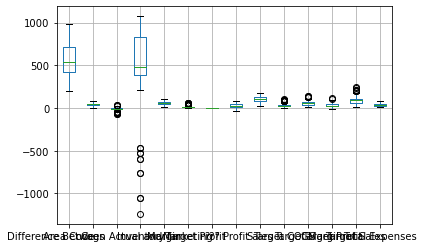

In [63]:
coffee_table.boxplot()

In [64]:
coffee_table.describe()

,Area Code,Cogs,Difference Between Actual and Target Profit,Inventory,Margin,Marketing,???,Profit,Sales,Target COGS,Target Margin,Target Profit,Target Sales,Total Expenses
count,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.0,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000
mean,567.394295,41.134228,-8.130872,547.847315,57.932886,15.709732,1.0,25.359060,102.192953,33.036913,55.536913,33.489933,88.573826,37.308725
std,221.039706,15.536634,16.675438,299.890717,18.320275,11.171000,0.0,21.580304,34.039789,17.907474,21.883119,21.386438,38.385216,17.748817
min,203.000000,0.000000,-72.000000,-1239.000000,13.000000,0.000000,1.0,-30.000000,23.000000,0.000000,10.000000,-10.000000,10.000000,11.000000
25%,423.500000,31.000000,-16.000000,391.000000,43.000000,9.000000,1.0,11.000000,77.000000,20.000000,40.000000,20.000000,60.000000,21.000000
50%,541.000000,43.000000,-7.000000,486.000000,63.000000,13.000000,1.0,27.000000,109.000000,30.000000,60.000000,30.000000,90.000000,37.000000
75%,719.000000,52.000000,2.250000,833.000000,71.000000,18.250000,1.0,42.000000,128.000000,40.000000,70.000000,50.000000,110.000000,46.000000
max,985.000000,80.000000,31.000000,1075.000000,101.000000,54.000000,1.0,86.000000,174.000000,110.000000,140.000000,120.000000,250.000000,83.000000


In [65]:
#variance is high in our inventory demand

### We are trying to analyze performance
First, lets analyze the product lines, then descend down to products

In [9]:
#Analyzing Both lines

(-20.0, 10.0)

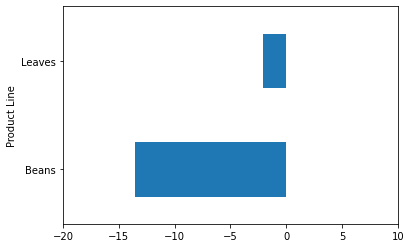

In [66]:
coffee_table.groupby('Product Line')['Difference Between Actual and Target Profit'].mean().plot(kind='barh')
plt.xlim(-20,10)

# It seems that both lines aren't profitable, but beans is performing much worse

<AxesSubplot:ylabel='Product Line'>

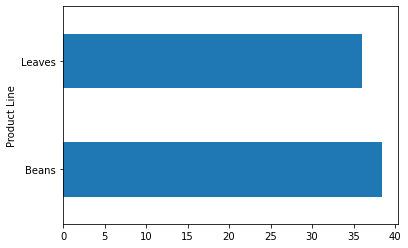

In [67]:
coffee_table.groupby('Product Line')['Total Expenses'].mean().plot(kind='barh')

In [59]:
#and tho beans is doing much worse it seems to be costing us more

#lets compare total profit vs target profit

Text(0.5, 1.0, 'Total Profit Vs Target Profit')

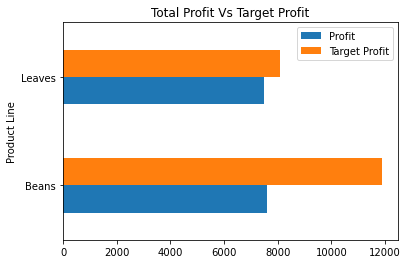

In [70]:
coffee_table.groupby('Product Line')[['Profit','Target Profit']].sum().plot(kind='barh')
plt.title('Total Profit Vs Target Profit')


#### it's clear that we haven't achieved ou target profit in beans, where's leaves line is performing well.
tho beans achieved the same profit as leaves, but the target profit for beans is more, that's why it isn't profitable

further investigations to discover the reason behind this

Text(0.5, 1.0, 'Total Sales Vs Target Sales')

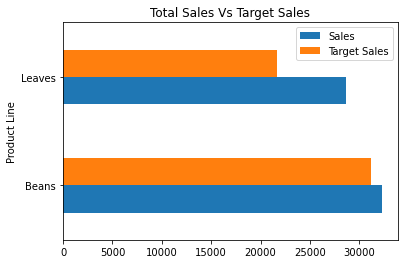

In [71]:
coffee_table.groupby('Product Line')[['Sales','Target Sales']].sum().plot(kind='barh')
plt.title('Total Sales Vs Target Sales')

**Sales is better in beans, but we could call the non-profitability for not achieving the target + having much higher expenses**

Let's compare inventory

Text(0.5, 1.0, 'Total Inventory')

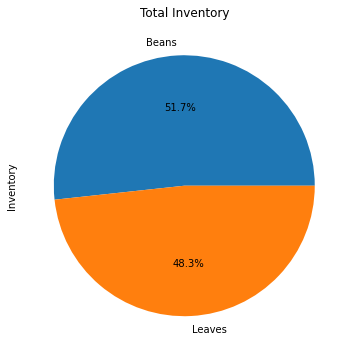

In [76]:
coffee_table.groupby('Product Line')['Inventory'].sum().plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(8,6))
plt.title('Total Inventory')

Text(0.5, 1.0, 'Total Cogs')

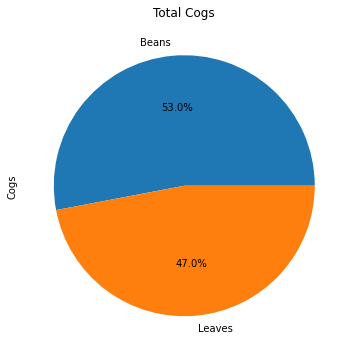

In [77]:
coffee_table.groupby('Product Line')['Cogs'].sum().plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(8,6))
plt.title('Total Cogs')

# It's clear also that total inventory for beans is more than that for leaves, simultaneously, the cost of goods for beans is higher.

This adds an additional reason to why it's not profitable

# let's analyze the market size

Text(0.5, 1.0, 'Total Profit Vs Target Profit')

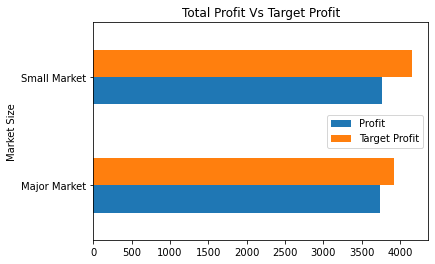

In [81]:
#for leaves
leaves=coffee_table[coffee_table['Product Line']=="Leaves"]
leaves.groupby('Market Size')[['Profit','Target Profit']].sum().plot(kind='barh')
plt.title('Total Profit Vs Target Profit')

Text(0.5, 1.0, 'Total Sales Vs Target Sales')

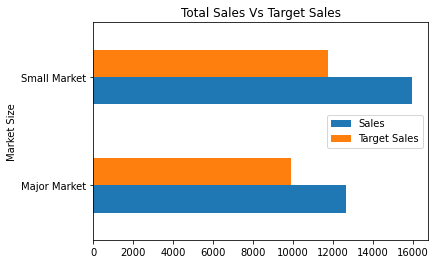

In [82]:
leaves.groupby('Market Size')[['Sales','Target Sales']].sum().plot(kind='barh')
plt.title('Total Sales Vs Target Sales')

In [84]:
# Fo leaves: sales in small markts are better, however, not achieved target sales and profit for both markets
#plus, maybe we need to increase our Major market target

Text(0.5, 1.0, 'Total Profit Vs Target Profit')

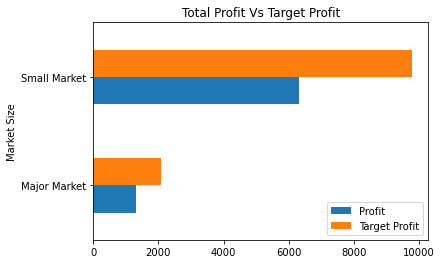

In [85]:
#for beans
Beans=coffee_table[coffee_table['Product Line']=="Beans"]
Beans.groupby('Market Size')[['Profit','Target Profit']].sum().plot(kind='barh')
plt.title('Total Profit Vs Target Profit')

Text(0.5, 1.0, 'Total Sales Vs Target Sales')

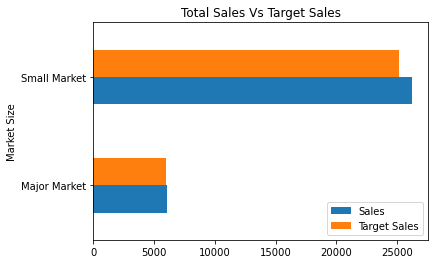

In [86]:
Beans.groupby('Market Size')[['Sales','Target Sales']].sum().plot(kind='barh')
plt.title('Total Sales Vs Target Sales')

**our performance isn't really good regarding beans when cosidering both markets**

In addition, target sales and profit for major market are very low, even we exceeded target for both. We may need to increase our margin

### We can conclude the following:
    1-we have potential problems regarding beans line , considering 'Expected Profit'
    2-Our leaves line is also having problems, not as beans
    
    a-we need to increase target sales,profit bottom line for both beans and leaves,especially beans
    b- increase our inventory size of leaves
    c-we need to increase our sales stores in large markets regarding beans especially
    
**Further exploration for the dara for more details**

# First Lets Analyze beans line

In [87]:
Beans['Product Type'].unique()

array(['Espresso', 'Coffee'], dtype=object)

In [88]:
#let's analyze both Espresso and coffee

# Espresso

In [89]:
Espresso=Beans[Beans['Product Type']=="Espresso"]
Espresso

,Area Code,Cogs,Difference Between Actual and Target Profit,Date,Inventory,Margin,Market Size,Market,Marketing,???,...,Product,Profit,Sales,State,Target COGS,Target Margin,Target Profit,Target Sales,Total Expenses,Type
5,712,0,-29,10/1/2012 0:00,430,43,Small Market,Central,0,1,...,Decaf Espresso,31,43,Iowa,0,60,60,60,12,Decaf
6,860,47,-29,10/1/2012 0:00,375,64,Small Market,East,15,1,...,Decaf Espresso,21,111,Connecticut,30,60,50,90,43,Decaf
9,435,40,-23,10/1/2012 0:00,881,59,Small Market,West,11,1,...,Decaf Espresso,37,99,Utah,20,60,60,80,22,Decaf
12,603,45,-37,10/1/2012 0:00,320,64,Small Market,East,41,1,...,Caffe Mocha,-7,109,New Hampshire,30,60,30,90,71,Regular
13,318,60,-9,10/1/2012 0:00,-762,84,Small Market,South,54,1,...,Caffe Latte,1,144,Louisiana,30,60,10,90,83,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,775,16,0,12/1/2012 0:00,851,25,Small Market,West,4,1,...,Caffe Mocha,10,41,Nevada,10,20,10,30,15,Regular
993,206,22,-5,10/1/2013 0:00,573,29,Small Market,West,7,1,...,Caffe Latte,15,54,Washington,10,20,20,30,19,Regular
994,775,21,1,10/1/2013 0:00,846,31,Small Market,West,5,1,...,Caffe Mocha,21,55,Nevada,10,20,20,30,17,Regular
1022,775,15,3,11/1/2013 0:00,848,24,Small Market,West,4,1,...,Caffe Mocha,13,42,Nevada,10,20,10,30,15,Regular


Text(0.5, 1.0, 'Espresso Target Margin Vs Actual Margin')

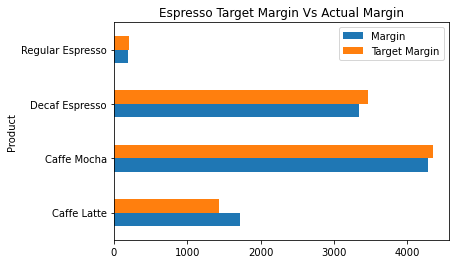

In [90]:
Espresso[['Product','Margin','Target Margin']].groupby('Product').sum().plot(kind='barh')
plt.title('Espresso Target Margin Vs Actual Margin')

In [91]:
#caffee mocha is performing the best, Regular Espresso is performing the worst

Text(0.5, 1.0, 'Espresso Target Profit Vs Actual Profit')

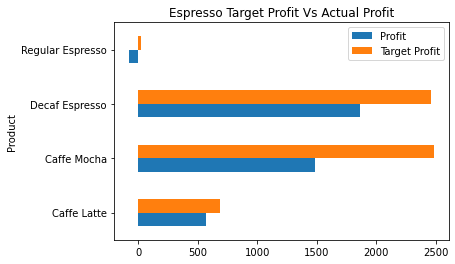

In [92]:
Espresso[['Product','Profit','Target Profit']].groupby('Product').sum().plot(kind='barh')
plt.title('Espresso Target Profit Vs Actual Profit')

In [93]:
#Decaf spresso,and Mocha has the best profit

Text(0.5, 1.0, 'Espresso Target Sales Vs Actual Sales')

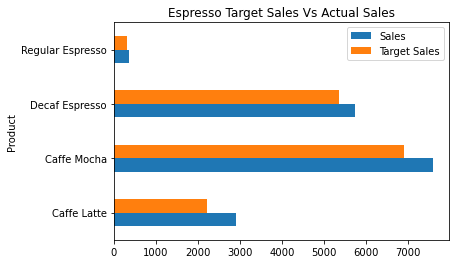

In [94]:
Espresso[['Product','Sales','Target Sales']].groupby('Product').sum().plot(kind='barh')
plt.title('Espresso Target Sales Vs Actual Sales')

**our sales exceeded target sales, i.e. we need to increase our target**

Text(0.5, 1.0, 'Espresso Target Cogs Vs Actual Cogs')

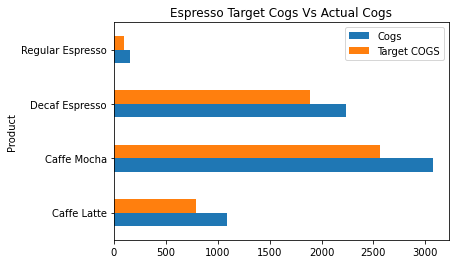

In [95]:
Espresso[['Product','Cogs','Target COGS']].groupby('Product').sum().plot(kind='barh')
plt.title('Espresso Target Cogs Vs Actual Cogs')

In [96]:
#highest inventory caffee mocha, exceeded the target cost => 'other expenses problem'

In [97]:
Espresso[['Inventory','Market Size','Market']].groupby(['Market Size','Market']).sum()

Inventory
Market Size  Market            
Major Market Central       5529
             East          3334
             South          540
Small Market Central      23032
             East          7996
             South         3915
             West         35432

our cost of goods exceeded our bottom line , i.e. we need to increase budget of espresso regarding cost of goods for more inventory and better sales

In [98]:
Espresso[['Inventory','Market Size','State']].groupby(['Market Size','State']).sum()

Inventory
Market Size  State                   
Major Market Colorado            3057
             Massachusetts       3334
             Ohio                2472
             Texas                540
Small Market Connecticut         4760
             Iowa                7140
             Louisiana            727
             Missouri           10354
             Nevada             12230
             New Hampshire       3236
             New Mexico           284
             Oklahoma            2904
             Oregon              4952
             Utah               10354
             Washington          7896
             Wisconsin           5538

In [99]:
Espresso[['Inventory','Market Size','State']].groupby(['Market Size']).sum()

,Inventory
Market Size,
Major Market,9403
Small Market,70375


Text(0.5, 1.0, 'Espresso Inventory by Makret Size')

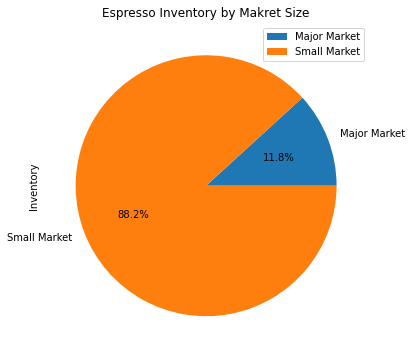

In [100]:
Espresso[['Inventory','Market Size','State']].groupby(['Market Size']).sum().plot(kind='pie',subplots=True, autopct='%1.1f%%',figsize=(8,6))
plt.title('Espresso Inventory by Makret Size')

In [101]:
#we need to increase our major market size

# Coffee

In [102]:
Coffee=Beans[Beans['Product Type']=="Coffee"]
Coffee

,Area Code,Cogs,Difference Between Actual and Target Profit,Date,Inventory,Margin,Market Size,Market,Marketing,???,...,Product,Profit,Sales,State,Target COGS,Target Margin,Target Profit,Target Sales,Total Expenses,Type
7,918,27,-39,10/1/2012 0:00,859,39,Small Market,South,7,1,...,Decaf Irish Cream,21,66,Oklahoma,30,60,60,90,18,Decaf
8,775,31,-43,10/1/2012 0:00,1000,37,Small Market,West,9,1,...,Decaf Irish Cream,7,68,Nevada,30,60,50,90,30,Decaf
10,603,49,-27,10/1/2012 0:00,310,71,Small Market,East,15,1,...,Amaretto,33,120,New Hampshire,30,60,60,90,38,Regular
11,603,45,-26,10/1/2012 0:00,447,69,Small Market,East,14,1,...,Colombian,24,114,New Hampshire,30,60,50,90,45,Regular
14,775,34,-32,10/1/2012 0:00,240,43,Small Market,West,12,1,...,Colombian,-2,77,Nevada,40,60,30,100,45,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,435,69,8,11/1/2013 0:00,1060,81,Small Market,West,21,1,...,Amaretto,58,160,Utah,80,90,50,170,42,Regular
1020,541,53,-19,11/1/2013 0:00,470,75,Small Market,West,17,1,...,Colombian,21,136,Oregon,60,90,40,150,61,Regular
1021,253,63,4,11/1/2013 0:00,446,93,Small Market,West,20,1,...,Colombian,74,166,Washington,70,110,70,180,43,Regular
1043,801,68,-11,12/1/2013 0:00,619,85,Small Market,West,25,1,...,Decaf Irish Cream,39,163,Utah,80,100,50,180,59,Decaf


Text(0.5, 1.0, 'Coffee Target Margin Vs Actual Margin')

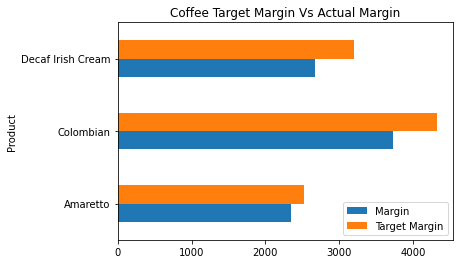

In [103]:
Coffee[['Product','Margin','Target Margin']].groupby('Product').sum().plot(kind='barh')
plt.title('Coffee Target Margin Vs Actual Margin')

Text(0.5, 1.0, 'Coffee Target Profit Vs Actual Profit')

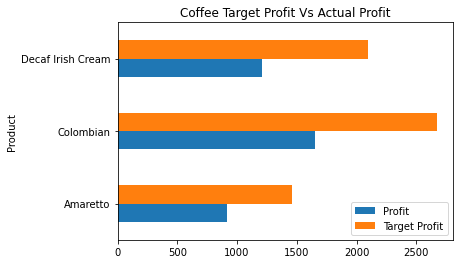

In [104]:
Coffee[['Product','Profit','Target Profit']].groupby('Product').sum().plot(kind='barh')
plt.title('Coffee Target Profit Vs Actual Profit')

In [44]:
#colombian caffee is our best profit

In [105]:
#Amaretto is the worst

Text(0.5, 1.0, 'Coffee Target Sales Vs Actual Sales')

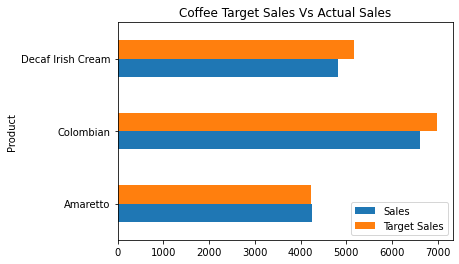

In [106]:
Coffee[['Product','Sales','Target Sales']].groupby('Product').sum().plot(kind='barh')
plt.title('Coffee Target Sales Vs Actual Sales')

Text(0.5, 1.0, 'Coffee Target Cogs Vs Actual Cogs')

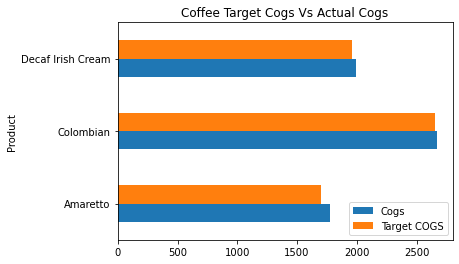

In [107]:
Coffee[['Product','Cogs','Target COGS']].groupby('Product').sum().plot(kind='barh')
plt.title('Coffee Target Cogs Vs Actual Cogs')

Text(0.5, 1.0, 'Coffee Inventory by Makret Size')

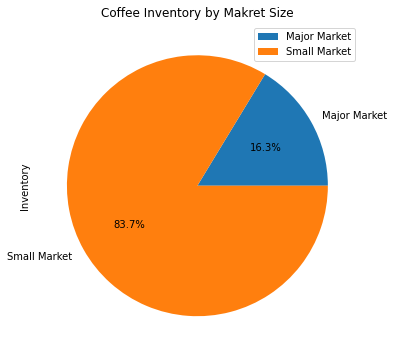

In [108]:
Coffee[['Inventory','Market Size','State']].groupby(['Market Size']).sum().plot(kind='pie',subplots=True, autopct='%1.1f%%',figsize=(8,6))
plt.title('Coffee Inventory by Makret Size')

In [50]:
#we need to pay attention to major markets

**conclusion:**
    
    1-We need to increase our sales margin regarding irish cream and amaretto
    2-we need to expand in major market regarding coffee
    3- we need further analysis for products that ain't performing well

# Analyzing leaves line

In [118]:
leaves = coffee_table[coffee_table['Product Line']=='Leaves']
leaves['Product Type'].unique()

array(['Herbal Tea', 'Tea'], dtype=object)

# Analyzing Herbal Tea

In [120]:
Herbal_tea=leaves[leaves['Product Type']=="Herbal Tea"]
Herbal_tea

,Area Code,Cogs,Difference Between Actual and Target Profit,Date,Inventory,Margin,Market Size,Market,Marketing,???,...,Product,Profit,Sales,State,Target COGS,Target Margin,Target Profit,Target Sales,Total Expenses,Type
0,303,51,-35,10/1/2012 0:00,503,71,Major Market,Central,46,1,...,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,-24,10/1/2012 0:00,405,71,Major Market,Central,17,1,...,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2,409,43,-22,10/1/2012 0:00,419,64,Major Market,South,13,1,...,Lemon,28,107,Texas,30,60,50,90,36,Decaf
16,573,45,-36,10/1/2012 0:00,320,64,Small Market,Central,41,1,...,Chamomile,-6,109,Missouri,20,60,30,80,70,Decaf
17,262,48,-15,10/1/2012 0:00,851,70,Small Market,Central,13,1,...,Lemon,45,118,Wisconsin,30,60,60,90,25,Decaf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,505,16,3,12/1/2013 0:00,851,25,Small Market,South,4,1,...,Chamomile,13,44,New Mexico,10,20,10,30,16,Decaf
649,386,22,-10,10/1/2012 0:00,573,29,Major Market,East,7,1,...,Chamomile,10,51,Florida,0,20,20,20,19,Decaf
664,561,22,1,11/1/2012 0:00,570,30,Major Market,East,7,1,...,Chamomile,11,52,Florida,10,20,10,30,19,Decaf
691,904,22,-5,10/1/2013 0:00,573,29,Major Market,East,7,1,...,Chamomile,15,54,Florida,0,20,20,20,19,Decaf


Text(0.5, 1.0, 'Herbal Tea Target Margin Vs Actual Margin')

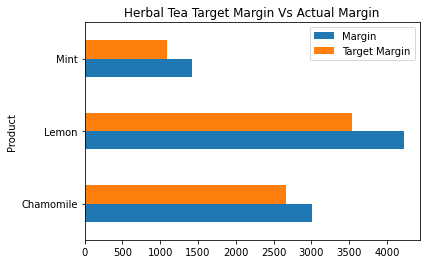

In [121]:
Herbal_tea[['Product','Margin','Target Margin']].groupby('Product').sum().plot(kind='barh')
plt.title('Herbal Tea Target Margin Vs Actual Margin')

In [124]:
#Margin Exceeded the target margin, lemon performing best, we need to increase bottom line for mint and chamomile

Text(0.5, 1.0, 'Herbal Tea Target Profit Vs Actual Profit')

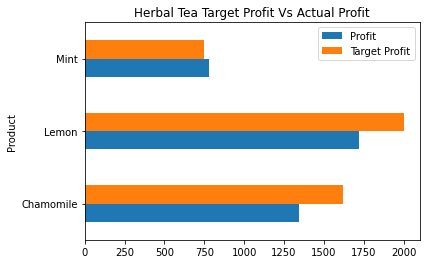

In [123]:
Herbal_tea[['Product','Profit','Target Profit']].groupby('Product').sum().plot(kind='barh')
plt.title('Herbal Tea Target Profit Vs Actual Profit')

In [125]:
#we need to increase target profit for mint

Text(0.5, 1.0, 'Herbal_tea Target Sales Vs Actual Sales')

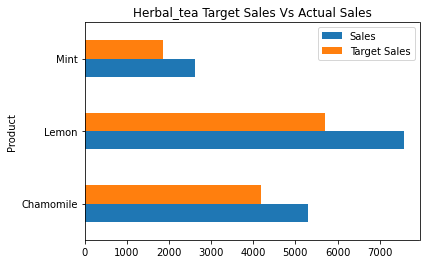

In [126]:
Herbal_tea[['Product','Sales','Target Sales']].groupby('Product').sum().plot(kind='barh')
plt.title('Herbal_tea Target Sales Vs Actual Sales')

In [127]:
#we need to increase target sales for all

Text(0.5, 1.0, 'Herbal_tea Target Cogs Vs Actual Cogs')

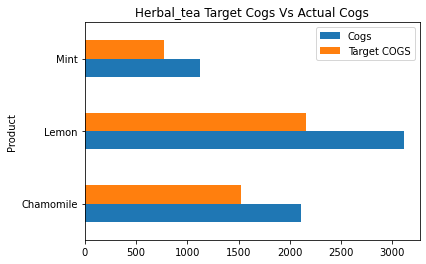

In [128]:
Herbal_tea[['Product','Cogs','Target COGS']].groupby('Product').sum().plot(kind='barh')
plt.title('Herbal_tea Target Cogs Vs Actual Cogs')

In [129]:
#cogs exceeded target. i.e. cogs bottom line should be increased

Text(0.5, 1.0, 'Herbal_tea Inventory by Makret Size')

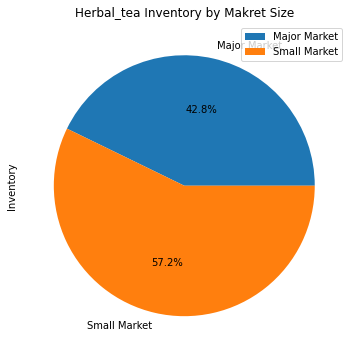

In [130]:
Herbal_tea[['Inventory','Market Size','State']].groupby(['Market Size']).sum().plot(kind='pie',subplots=True, autopct='%1.1f%%',figsize=(8,6))
plt.title('Herbal_tea Inventory by Makret Size')

# Tea

In [131]:
Tea=leaves[leaves['Product Type']=="Tea"]
Tea

,Area Code,Cogs,Difference Between Actual and Target Profit,Date,Inventory,Margin,Market Size,Market,Marketing,???,...,Product,Profit,Sales,State,Target COGS,Target Margin,Target Profit,Target Sales,Total Expenses,Type
3,850,38,-15,10/1/2012 0:00,871,56,Major Market,East,10,1,...,Darjeeling,35,94,Florida,40,60,50,100,21,Regular
20,860,40,-14,10/1/2012 0:00,881,59,Small Market,East,11,1,...,Darjeeling,36,99,Connecticut,40,60,50,100,23,Regular
29,719,55,-5,11/1/2012 0:00,410,69,Major Market,Central,20,1,...,Darjeeling,15,124,Colorado,40,60,20,100,54,Regular
30,847,50,8,11/1/2012 0:00,589,73,Major Market,Central,14,1,...,Darjeeling,48,123,Illinois,40,60,40,100,25,Regular
31,719,57,-1,11/1/2012 0:00,1042,68,Major Market,Central,17,1,...,Earl Grey,29,125,Colorado,40,60,30,100,39,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,435,25,-22,10/1/2012 0:00,209,31,Small Market,West,9,1,...,Green Tea,-12,56,Utah,0,20,10,20,43,Regular
973,435,20,-15,12/1/2012 0:00,218,25,Small Market,West,7,1,...,Green Tea,-15,45,Utah,10,20,0,30,40,Regular
1003,971,21,4,10/1/2013 0:00,480,32,Small Market,West,5,1,...,Darjeeling,24,56,Oregon,0,20,20,20,16,Regular
1006,435,25,-28,10/1/2013 0:00,209,31,Small Market,West,9,1,...,Green Tea,-18,60,Utah,0,20,10,20,43,Regular


Text(0.5, 1.0, 'Tea Target Margin Vs Actual Margin')

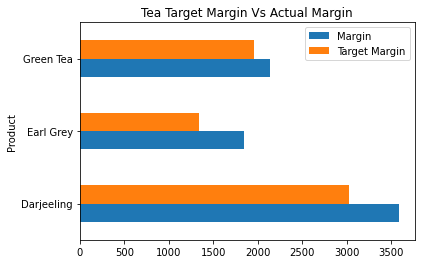

In [132]:
Tea[['Product','Margin','Target Margin']].groupby('Product').sum().plot(kind='barh')
plt.title('Tea Target Margin Vs Actual Margin')

In [133]:
#we need to increase the target margin for all especially earl grey

Text(0.5, 1.0, 'Tea Target Profit Vs Actual Profit')

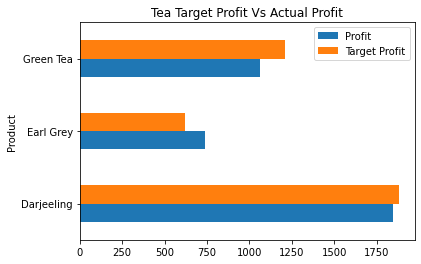

In [134]:
Tea[['Product','Profit','Target Profit']].groupby('Product').sum().plot(kind='barh')
plt.title('Tea Target Profit Vs Actual Profit')

In [135]:
#we need to increase the target profit especially for earl grey

Text(0.5, 1.0, 'Tea Target Sales Vs Actual Sales')

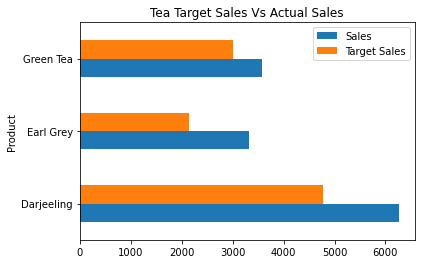

In [136]:
Tea[['Product','Sales','Target Sales']].groupby('Product').sum().plot(kind='barh')
plt.title('Tea Target Sales Vs Actual Sales')

In [137]:
#also here problem in the target sales

Text(0.5, 1.0, 'Tea Inventory by Makret Size')

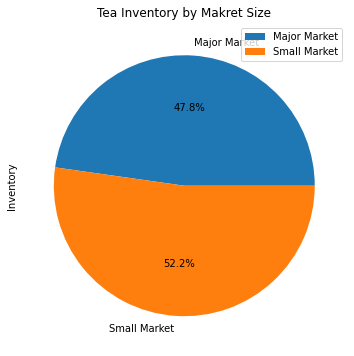

In [138]:
Tea[['Inventory','Market Size','State']].groupby(['Market Size']).sum().plot(kind='pie',subplots=True, autopct='%1.1f%%',figsize=(8,6))
plt.title('Tea Inventory by Makret Size')

# Lets discover other patterns and try to establish correlations

**let's check if there's correlation between marketing investment and profit**

In [141]:
coffee_table[['Marketing','Profit']].corr()

,Marketing,Profit
Marketing,1.000000,-0.315346
Profit,-0.315346,1.000000


In [142]:
from scipy import stats
import numpy as np

In [144]:
pearson_coef, p_value=stats.pearsonr(coffee_table['Marketing'],coffee_table['Profit'])
pearson_coef, p_value

(-0.3153462756236022, 3.1586344225263833e-15)

Text(0.5, 1.0, 'Correlation between Profit and Marketing Investment')

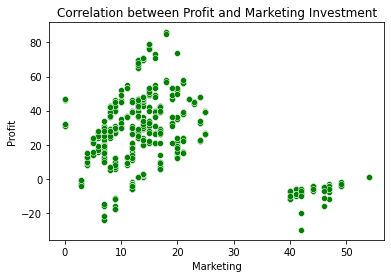

In [145]:
sns.scatterplot(data=coffee_table, x="Marketing", y="Profit", color='g')
plt.title('Correlation between Profit and Marketing Investment')

**weak correlation and this correlations is not due to chance.**

i.e. we need new strategy for the marketing department as it is not impacting profit

In [87]:
#let's check it's impact on difference between profit and margin

In [147]:
coffee_table[['Difference Between Actual and Target Profit','Marketing']].corr()

,Difference Between Actual and Target Profit,Marketing
Difference Between Actual and Target Profit,1.000000,-0.193767
Marketing,-0.193767,1.000000


In [148]:
pearson_coef, p_value=stats.pearsonr(coffee_table['Difference Between Actual and Target Profit'],coffee_table['Marketing'])
pearson_coef, p_value

(-0.19376712622344439, 1.8813621574484385e-06)

Text(0.5, 1.0, 'Correlation between Difference Between Actual and Target Profit and Marketing Investment')

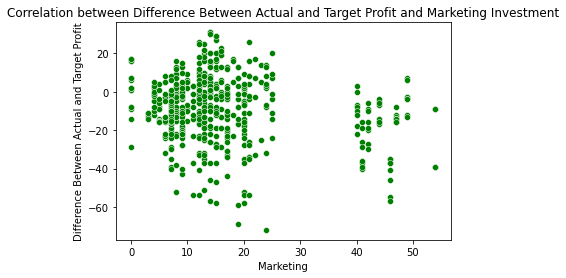

In [149]:
sns.scatterplot(data=coffee_table, x="Marketing", y="Difference Between Actual and Target Profit", color='g')
plt.title('Correlation between Difference Between Actual and Target Profit and Marketing Investment')

so, there's a weak correlation between difference in margin and profit and marketing, and this correlation is statistically significant

**lets check the correlation between Expenses and Profit**

In [150]:
coffee_table[['Total Expenses','Profit']].corr()

,Total Expenses,Profit
Total Expenses,1.000000,-0.437688
Profit,-0.437688,1.000000


In [152]:
pearson_coef, p_value=stats.pearsonr(coffee_table['Total Expenses'],coffee_table['Profit'])
pearson_coef, p_value

(-0.43768827910465774, 2.7562041742977765e-29)

Text(0.5, 1.0, 'Correlation between Total Expenses and Marketing Investment')

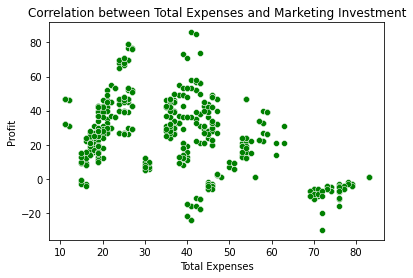

In [154]:
sns.scatterplot(data=coffee_table, x="Total Expenses", y="Profit", color='g')
plt.title('Correlation between Total Expenses and Marketing Investment')

### weak correlation and the relationship is statistically significant. 
i.e. we need to consider more how we are investing our money if it's not directly impacting our profit 

### We want to know where the marketing problem lies, so lets filter our data by products to see if the problem is with the marketing strategy of th product or related to market type

In [157]:
Marketing_Analysis_Leaves=coffee_table[coffee_table['Product Line']=='Leaves']

In [158]:
Marketing_Analysis_Leaves[['Marketing','Profit']].corr()

,Marketing,Profit
Marketing,1.000000,-0.269356
Profit,-0.269356,1.000000


In [159]:
pearson_coef, p_value=stats.pearsonr(Marketing_Analysis_Leaves['Marketing'],Marketing_Analysis_Leaves['Profit'])
pearson_coef, p_value

(-0.26935598131450883, 4.649079446200109e-06)

In [160]:
Marketing_Analysis_Beans=coffee_table[coffee_table['Product Line']=='Beans']

In [161]:
Marketing_Analysis_Beans[['Marketing','Profit']].corr()

,Marketing,Profit
Marketing,1.00000,-0.34622
Profit,-0.34622,1.00000


In [162]:
#weak in both , so we have overall marketing problem

# so in conclusion
**we have an overall problem in how we estimate our target 'bottom line' and marketing strategy**

In [163]:
coffee_table.to_csv('coffee_chain.csv')